In [58]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
books = pd.read_csv('books.csv')

books = books.drop(['isbn','isbn13','original_publication_year','title','best_book_id','work_id','work_text_reviews_count','work_ratings_count','books_count','language_code','work_text_reviews_count','work_ratings_count','image_url'],axis=1)
books.head()

,id,book_id,authors,original_title,average_rating,ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,small_image_url
0,1,2767052,Suzanne Collins,The Hunger Games,4.34,4780653,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603s...
1,2,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Philosopher's Stone,4.44,4602479,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022s...
2,3,41865,Stephenie Meyer,Twilight,3.57,3866839,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443s...
3,4,2657,Harper Lee,To Kill a Mockingbird,4.25,3198671,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680s...
4,5,4671,F. Scott Fitzgerald,The Great Gatsby,3.89,2683664,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560s...


In [2]:
bookTags = pd.read_csv('book_tags.csv')
bookTags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [3]:
tags = pd.read_csv('tags.csv')
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [4]:
to_read = pd.read_csv('to_read.csv')
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [5]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [6]:
duplicatedRatings = ratings[ratings.duplicated()]
duplicatedRatings.shape

(1644, 3)

In [7]:
ratings.drop_duplicates(keep=False,inplace=True) 
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


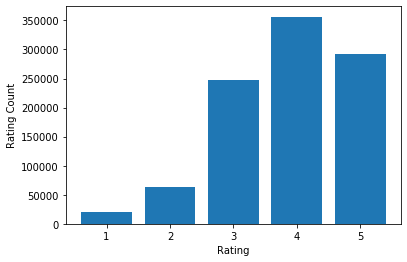

In [8]:
ratings_group = ratings.groupby('rating')
ratings_count = ratings_group['user_id'].agg('count')
number_ratings = np.array([1,2,3,4,5])
plt.bar(number_ratings,ratings_count)
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.show()

In [9]:
sampleUsers = np.array(ratings['user_id'].unique())
sample = pd.DataFrame(ratings[ratings['user_id'].isin(sampleUsers[0:10000])])
sample.shape

(546703, 3)

In [10]:
sample_group = sample.groupby('user_id')
sample_group.describe().head()

book_id                                                              \
          count         mean          std     min      25%     50%      75%   
user_id                                                                       
1           3.0  4119.333333  2638.972590  1180.0  3036.50  4893.0  5589.00   
7          76.0  4045.710526  2312.297650   585.0  2097.50  3493.0  5352.75   
10         16.0  6172.437500  2516.584934  1506.0  4384.75  6028.5  7901.50   
23         42.0  6620.785714  2227.284637  1104.0  5141.50  6844.5  8248.00   
35        125.0  1874.480000  2144.481179    78.0   500.00   961.0  2524.00   

                rating                                                 
            max  count      mean       std  min   25%  50%   75%  max  
user_id                                                                
1        6285.0    3.0  3.666667  0.577350  3.0  3.50  4.0  4.00  4.0  
7        9103.0   76.0  3.763158  0.950346  1.0  3.00  4.0  4.00  5.0  
10       9854.0   16.0  3.750000  1.000000  2.0  3.75  4.0  4.00  5.0  
23       9909.0   42.0  3.000000  0.732520  2.0  2.25  3.0  3.75  4.0  
35       9835.0  125.0  3.040000  0.786991  1.0  2.00  3.0  4.00  5.0

In [11]:
sample_rating_per_user = sample_group['rating'].agg('count')

<function matplotlib.pyplot.show(*args, **kw)>

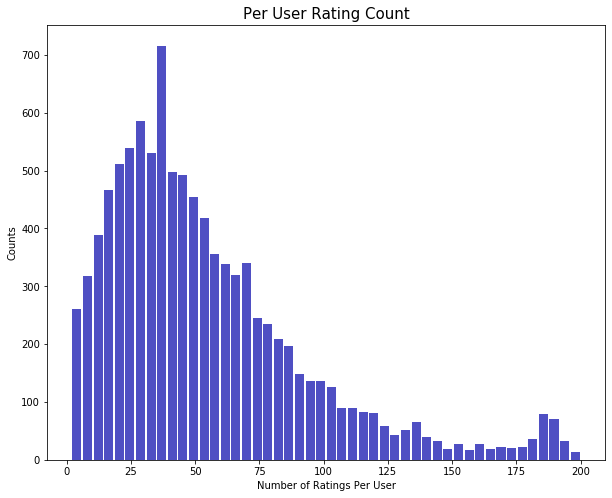

In [12]:
plt.figure(figsize=[10,8])
plt.hist(sample_rating_per_user,bins='auto',color='#0504aa',alpha=0.7, rwidth=0.85)
plt.xlabel('Number of Ratings Per User')
plt.ylabel('Counts')
plt.title('Per User Rating Count',fontsize=15)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

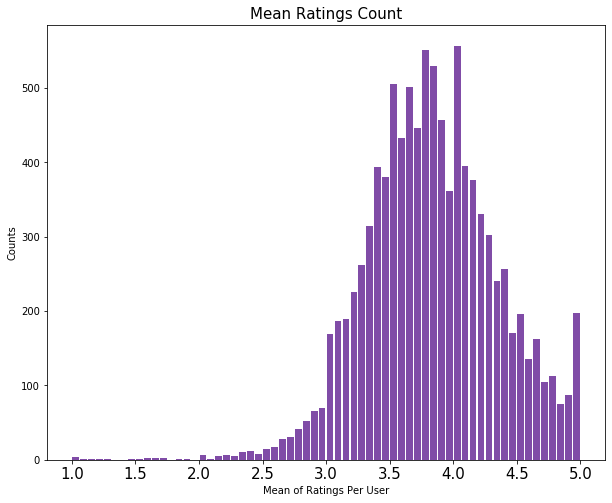

In [13]:
sample_rating_mean = sample_group['rating'].agg('mean')
plt.figure(figsize=[10,8])
plt.hist(sample_rating_mean,bins='auto',color='indigo',alpha=0.7, rwidth=0.85)
plt.title('Mean Ratings Count',fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Mean of Ratings Per User')
plt.ylabel('Counts')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

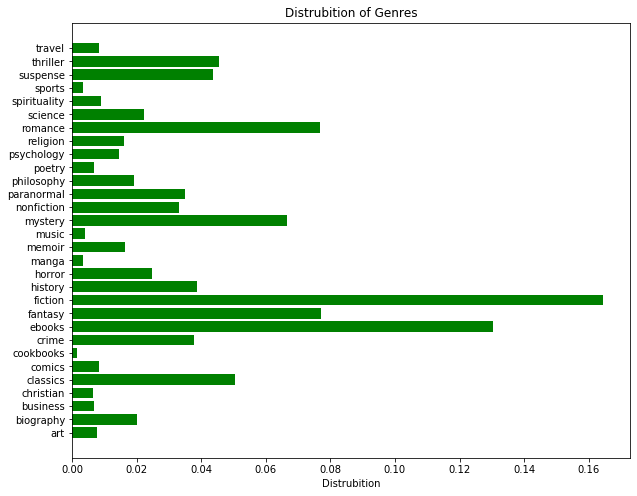

In [14]:
genres = ["Art", "Biography", "Business", "Children's", "Christian", "Classics", "Comics", "Cookbooks", "Crime", "Ebooks", "Fantasy", "Fiction", "Graphic Novels", "Historical Fiction", "History", "Horror", "Humor and Comedy", "Manga", "Memoir", "Music", "Mystery", "Nonfiction", "Paranormal", "Philosophy", "Poetry", "Psychology", "Religion", "Romance", "Science", "Science Fiction", "Self Help", "Suspense", "Spirituality", "Sports", "Thriller", "Travel", "Young Adult"]
genres = [x.lower() for x in genres]
availableGenres = tags[tags['tag_name'].isin(genres)]
tag_groups = bookTags[bookTags['tag_id'].isin(availableGenres['tag_id'].tolist())]
groups = tag_groups.groupby('tag_id')
group_count = np.array(groups['count'].agg('count'))
group_count = group_count / np.sum(group_count)

plt.figure(figsize=[10,8])
plt.barh(availableGenres['tag_name'], group_count, align='center',
        color='green', ecolor='black')
plt.xlabel('Distrubition')
plt.title('Distrubition of Genres')
plt.show

In [61]:
userInput = [
            {'original_title':'Harry Potter and the Goblet of Fire', 'rating':5},
            {'original_title':'Divergent', 'rating':2.5},
            {'original_title':'The Da Vinci Code', 'rating':3.5},
            {'original_title':"Catching Fire", 'rating':4},
            {'original_title':'The Great Gatsby', 'rating':4.5},
            {'original_title':'Animal Farm: A Fairy Story','rating':5}
         ] 
inputBooks = pd.DataFrame(userInput)
inputBooks

,original_title,rating
0,Harry Potter and the Goblet of Fire,5.0
1,Divergent,2.5
2,The Da Vinci Code,3.5
3,Catching Fire,4.0
4,The Great Gatsby,4.5
5,Animal Farm: A Fairy Story,5.0


In [62]:
inputId = books[books['original_title'].isin(inputBooks['original_title'].tolist())]
inputId

,id,book_id,authors,original_title,average_rating,ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,small_image_url
4,5,4671,F. Scott Fitzgerald,The Great Gatsby,3.89,2683664,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560s...
11,12,13335037,Veronica Roth,Divergent,4.24,1903563,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506s...
13,14,7613,George Orwell,Animal Farm: A Fairy Story,3.87,1881700,66854,135147,433432,698642,648912,https://images.gr-assets.com/books/1424037542s...
16,17,6148028,Suzanne Collins,Catching Fire,4.30,1831039,10492,48030,262010,687238,980309,https://images.gr-assets.com/books/1358273780s...
23,24,6,"J.K. Rowling, Mary GrandPré",Harry Potter and the Goblet of Fire,4.53,1753043,6676,20210,151785,494926,1195045,https://images.gr-assets.com/books/1361482611s...
25,26,968,Dan Brown,The Da Vinci Code,3.79,1447148,71345,126493,340790,539277,479387,https://images.gr-assets.com/books/1303252999s...


In [63]:
booksNew = inputId.drop(['authors','average_rating','ratings_1','ratings_2','ratings_count','ratings_3','ratings_4','ratings_5','small_image_url'],axis=1)

inputBooks = pd.merge(booksNew,inputBooks)
inputBooks

,id,book_id,original_title,rating
0,5,4671,The Great Gatsby,4.5
1,12,13335037,Divergent,2.5
2,14,7613,Animal Farm: A Fairy Story,5.0
3,17,6148028,Catching Fire,4.0
4,24,6,Harry Potter and the Goblet of Fire,5.0
5,26,968,The Da Vinci Code,3.5


In [64]:
#Filtering out users that have read books that the input has read and storing it
userSubset = ratings[ratings['book_id'].isin(inputBooks['id'].tolist())]
userSubset.head()

,book_id,user_id,rating
400,5,314,4
401,5,1169,5
402,5,1952,5
403,5,2324,5
404,5,2487,3


In [65]:
GroupUserSubset = userSubset.groupby(['user_id'])

In [66]:
GroupUserSubset = sorted(GroupUserSubset,  key=lambda x: len(x[1]), reverse=True)
GroupUserSubset = GroupUserSubset[0:500]
GroupUserSubset

[(19724,       book_id  user_id  rating
  443         5    19724       5
  1134       12    19724       4
  1338       14    19724       4
  1645       17    19724       5
  2347       24    19724       5
  2544       26    19724       5), (21228,       book_id  user_id  rating
  448         5    21228       4
  1138       12    21228       5
  1341       14    21228       4
  1650       17    21228       5
  2351       24    21228       5
  2548       26    21228       4), (32635,       book_id  user_id  rating
  469         5    32635       3
  1155       12    32635       3
  1363       14    32635       3
  1672       17    32635       5
  2374       24    32635       5
  2568       26    32635       3), (51838,       book_id  user_id  rating
  497         5    51838       4
  1193       12    51838       4
  1398       14    51838       4
  1697       17    51838       5
  2398       24    51838       4
  2599       26    51838       4), (1169,       book_id  user_id  rating
  401

In [67]:
pearsonCorrelationDict = {}

for name, group in GroupUserSubset:
    group = group.sort_values(by='book_id')
    inputBooks = inputBooks.sort_values(by='id')
    nRatings = len(group)
    temp_df = inputBooks[inputBooks['id'].isin(group['book_id'].tolist())]
    tempRatingList = temp_df['rating'].tolist()
    tempGroupList = group['rating'].tolist()
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0


In [68]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['user_id'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,user_id
0,0.266076,19724
1,-0.282216,21228
2,0.332595,32635
3,-0.042070,51838
4,0.542326,1169


In [69]:
topSimilarUsers = pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topSimilarUsers.head()

,similarityIndex,user_id
120,1.0,17228
138,1.0,26053
162,1.0,43622
159,1.0,41318
165,1.0,47476


In [70]:
topSimilarUserRatings = topSimilarUsers.merge(ratings, left_on='user_id', right_on='user_id', how='inner')
topSimilarUserRatings.head()

,similarityIndex,user_id,book_id,rating
0,1.0,17228,4,5
1,1.0,17228,5,5
2,1.0,17228,8,4
3,1.0,17228,10,5
4,1.0,17228,15,5


In [71]:
topSimilarUserRatings['weightedRating'] = topSimilarUserRatings['similarityIndex']*topSimilarUserRatings['rating']
topSimilarUserRatings.head()

,similarityIndex,user_id,book_id,rating,weightedRating
0,1.0,17228,4,5,5.0
1,1.0,17228,5,5,5.0
2,1.0,17228,8,4,4.0
3,1.0,17228,10,5,5.0
4,1.0,17228,15,5,5.0


In [72]:
tempTopUsersRatings = topSimilarUserRatings.groupby('book_id').sum()[['similarityIndex','weightedRating']]
tempTopUsersRatings.columns=['sumSimilarityIndex','sumWeightedRating']
tempTopUsersRatings.head()

,sumSimilarityIndex,sumWeightedRating
book_id,,
1,17.348440,67.661329
2,14.441729,55.838805
3,11.780864,27.560509
4,17.386640,78.285092
5,20.987362,84.756872


In [73]:
rec_df = pd.DataFrame()
rec_df['weightedAverageScore'] = tempTopUsersRatings['sumWeightedRating'] / tempTopUsersRatings['sumSimilarityIndex']
rec_df['book_id'] = tempTopUsersRatings.index
rec_df.head()

,weightedAverageScore,book_id
book_id,,
1,3.900139,1
2,3.866490,2
3,2.339430,3
4,4.502600,4
5,4.038472,5


In [74]:
recommendation_df = rec_df.sort_values(by='weightedAverageScore', ascending=False)
recommendation_df.head(10)

,weightedAverageScore,book_id
book_id,,
3396,5.0,3396
3082,5.0,3082
601,5.0,601
2879,5.0,2879
1545,5.0,1545
2998,5.0,2998
2181,5.0,2181
896,5.0,896
2260,5.0,2260


In [75]:
recBookId = np.array(recommendation_df.head(10)['book_id'])
books['original_title'].loc[books['id'].isin(recBookId)]

600               The Tale of Peter Rabbit
779                      Calvin and Hobbes
895            We Need to Talk About Kevin
1544              The House at Pooh Corner
2180                     Tikki Tikki Tembo
2259                 A Pocket for Corduroy
2878    Mike Mulligan and His Steam Shovel
2997                          Magic Bleeds
3081              The Sandman: Brief Lives
3395              The Sandman: Worlds' End
Name: original_title, dtype: object